In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve,auc)
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from imblearn.over_sampling import SMOTE

In [2]:
path = './dataset/'
train_path = path + 'KDDTrain+.txt'
test_path = path + 'KDDTest+.txt'

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [4]:
traindata = pd.read_csv(train_path, header=None, names = col_names)
testdata = pd.read_csv(test_path, header=None, names = col_names)
print('Dimensions of the Training set:',traindata.shape)
print('Dimensions of the Test set:',testdata.shape)

Dimensions of the Training set: (125973, 43)
Dimensions of the Test set: (22544, 43)


# <font color=Red>数据集概况</font>

### 共43列；0 - 40列为特征；41列为攻击类型；42列为难度 (后面被删除)

In [5]:
traindata.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
traindata.drop('difficulty_level', axis=1, inplace=True)
testdata.drop('difficulty_level', axis=1, inplace=True)

In [7]:
traindata.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 标签分布
### 方法：value_counts()

In [8]:
print('Label distribution Training set:')
print(traindata['label'].value_counts())
print()
print('Label distribution Test set:')
print(testdata['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


## 特征分布
<font size=4 color= Red>离散特征分布不均匀，需要one-hot编码；共3+70+11=84 dummies</font>

In [9]:
print('Training set:')
for col_name in traindata.columns:
    if traindata[col_name].dtypes == 'object' : # 非数字类型列
        unique_cat = len(traindata[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
    
print()
print('Distribution of categories in service:')
print(traindata['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [10]:
print('Test set:')
for col_name in testdata.columns:
    if testdata[col_name].dtypes == 'object' :
        unique_cat = len(testdata[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


# <font color = Red>数据预处理</font>

## 离散特征One-hot; 连续特征归一化
归一化除了用MinMaxScaler()，还可以用pandas直接计算；

由于onehot-helper最终将结果加到原dataframe后面，因此可以直接一次选取前面需要归一化的列进行MinMaxScaler()

In [11]:
# 对目标列onehot，并加在源数据集后面
def onehot_helper(training_df,testing_df, name):
    # 仅对目标列get_dummies，可得到该单独部分onehot
    training_set_dummies = pd.get_dummies(training_df[name]) 
    testing_set_dummies = pd.get_dummies(testing_df[name])
    
    # 对全部数据集操作
    # 以训练集为准
    # 检查测试集，少则补（即train有但test无）；
    for x in training_set_dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        training_df[dummy_name] = training_set_dummies[x]
        if x in testing_set_dummies.columns :
            testing_df[dummy_name]=testing_set_dummies[x]
        else :
            testing_df[dummy_name]=np.zeros(len(testing_df))
            
    # 删除源列
    training_df.drop(name, axis=1, inplace=True)
    testing_df.drop(name, axis=1, inplace=True)

### onehot + 归一化：以下两种方式都可以

In [12]:
# 方法一：逐列
# MinMaxScaler()归一化
# def minmax_scale_values(training_df,testing_df, col_name):
#     scaler = MinMaxScaler()
#     # fit 计算max和min
#     scaler = scaler.fit(training_df[col_name].values.reshape(-1, 1)) #转为n * 1；
#     train_values_standardized = scaler.transform(training_df[col_name].values.reshape(-1, 1))
#     training_df[col_name] = train_values_standardized
#     test_values_standardized = scaler.transform(testing_df[col_name].values.reshape(-1, 1))
#     testing_df[col_name] = test_values_standardized
# 
# sympolic_columns=["protocol_type","service","flag"]
# label_column="label"
# for column in traindata.columns :
#     if column in sympolic_columns:
#         onehot_helper(traindata,testdata, column)
#     elif not column == label_column:
#         minmax_scale_values(traindata,testdata, column)

In [13]:
# 方法二：整体
sympolic_columns=["protocol_type","service","flag"]
for column in sympolic_columns:
    onehot_helper(traindata,testdata, column)

scaler = MinMaxScaler()
traindata.iloc[:,0:38] = scaler.fit_transform(traindata.iloc[:,0:38])
testdata.iloc[:,0:38] = scaler.fit_transform(testdata.iloc[:,0:38])

In [14]:
# 42 - 3 + 84 = 123
traindata.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
testdata.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


## 标签转为数字
<font size=4 color= Red>不适合用LabelEncoder，因为测试集和训练集的标签不同
    
使用unique().tolist()转换
</font>

In [16]:
attacks = traindata['label'].unique().tolist() + testdata['label'].unique().tolist()
attacks = sorted(set(attacks),key=attacks.index)
traindata['label_fine'] = traindata['label'].apply(lambda x : attacks.index(x))
testdata['label_fine'] = testdata['label'].apply(lambda x : attacks.index(x))

In [17]:
traindata.drop('label', axis=1, inplace=True)
testdata.drop('label', axis=1, inplace=True)

## 40类细粒度标签

In [18]:
attacks

['normal',
 'neptune',
 'warezclient',
 'ipsweep',
 'portsweep',
 'teardrop',
 'nmap',
 'satan',
 'smurf',
 'pod',
 'back',
 'guess_passwd',
 'ftp_write',
 'multihop',
 'rootkit',
 'buffer_overflow',
 'imap',
 'warezmaster',
 'phf',
 'land',
 'loadmodule',
 'spy',
 'perl',
 'saint',
 'mscan',
 'apache2',
 'snmpgetattack',
 'processtable',
 'httptunnel',
 'ps',
 'snmpguess',
 'mailbomb',
 'named',
 'sendmail',
 'xterm',
 'worm',
 'xlock',
 'xsnoop',
 'sqlattack',
 'udpstorm']

In [19]:
testdata['label_fine'].head()

0     1
1     1
2     0
3    23
4    24
Name: label_fine, dtype: int64

## 5类粗粒度标签 [NORMAL、PROBE、DOS、U2R、R2L]

In [20]:
NORMAL = [attacks.index('normal')]
PROBE = [attacks.index(x) for x in ['ipsweep','mscan','nmap','portsweep','saint','satan']]
DOS = [attacks.index(x) for x in ['apache2','back','land','mailbomb','neptune','pod','processtable','smurf','teardrop','udpstorm']]
U2R = [attacks.index(x) for x in ['buffer_overflow','httptunnel','loadmodule','perl','ps','rootkit','sqlattack','xterm']]
R2L = [attacks.index(x) for x in ['ftp_write','guess_passwd','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','worm','xlock','xsnoop']]

In [21]:
coarse_dic = {
    'NORMAL':0,
    'PROBE':1,
    'DOS':2,
    'U2R':3,
    'R2L':4}
def coarse_helper(x):
    if x in NORMAL:
        return coarse_dic['NORMAL']
    elif x in PROBE:
        return coarse_dic['PROBE']
    elif x in DOS:
        return coarse_dic['DOS']
    elif x in U2R:
        return coarse_dic['U2R']
    elif x in R2L:
        return coarse_dic['R2L']
traindata['label_coarse'] = traindata['label_fine'].apply(lambda x : coarse_helper(x))
testdata['label_coarse'] = testdata['label_fine'].apply(lambda x : coarse_helper(x))

In [22]:
print(traindata['label_coarse'].value_counts().sort_values(ascending=False))

0    67343
2    45927
1    11656
4      995
3       52
Name: label_coarse, dtype: int64


In [23]:
print(testdata['label_coarse'].value_counts().sort_values(ascending=False))

0    9711
2    7458
4    2754
1    2421
3     200
Name: label_coarse, dtype: int64


In [24]:
traindata.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'label_fine', 'label_coarse'],
      dtype='object', length=124)

# <font color= Red>一、粗粒度分类模型</font>

In [25]:
X = traindata.loc[:,~traindata.columns.isin(['label_coarse','label_fine'])]
Y = traindata.loc[:,'label_coarse']
X_test = testdata.loc[:,~testdata.columns.isin(['label_coarse','label_fine'])]
Y_test = testdata.loc[:,'label_coarse']

In [26]:
X.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=122)

### 小样本过采样

In [ ]:
x_smote_resampled, y_smote_resampled = SMOTE().fit_sample(X, Y)

In [30]:
from collections import Counter
print(sorted(Counter(y_smote_resampled).items())) # 打印输出经过SMOTE处理后的数据集样本分类分布

[(0, 67343), (1, 67343), (2, 67343), (3, 67343), (4, 67343)]


In [31]:
X = x_smote_resampled
Y = y_smote_resampled

## 1.全部特征

## 1.1 LogisticRegression
#### 样本分布不均时，小样本预测效果不佳

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, Y)
pre = model.predict(X_test)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79      9711
           1       0.73      0.76      0.74      2421
           2       0.97      0.81      0.88      7458
           3       0.17      0.21      0.19       200
           4       0.85      0.18      0.30      2754

    accuracy                           0.77     22544
   macro avg       0.68      0.58      0.58     22544
weighted avg       0.80      0.77      0.75     22544



G:\Anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 1.2 朴素贝叶斯
#### 样本分布不均时，小样本预测效果不佳

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
model = GaussianNB()
model.fit(X, Y)
pre = model.predict(X_test)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.43      0.49      0.46      9711
           1       0.26      0.10      0.14      2421
           2       0.88      0.41      0.56      7458
           3       0.02      0.06      0.03       200
           4       0.17      0.39      0.24      2754

    accuracy                           0.41     22544
   macro avg       0.35      0.29      0.29     22544
weighted avg       0.53      0.41      0.43     22544



In [34]:
model = MultinomialNB()
model.fit(X, Y)
pre = model.predict(X_test)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      9711
           1       0.32      0.88      0.47      2421
           2       0.89      0.32      0.47      7458
           3       0.07      0.18      0.10       200
           4       0.59      0.39      0.47      2754

    accuracy                           0.63     22544
   macro avg       0.53      0.53      0.47     22544
weighted avg       0.74      0.63      0.62     22544



In [35]:
model = BernoulliNB()
model.fit(X, Y)
pre = model.predict(X_test)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      9711
           1       0.30      0.84      0.44      2421
           2       0.87      0.32      0.47      7458
           3       0.21      0.21      0.21       200
           4       0.64      0.50      0.56      2754

    accuracy                           0.65     22544
   macro avg       0.57      0.56      0.51     22544
weighted avg       0.76      0.65      0.65     22544



## 1.3 KNN
慢
#### 样本分布不均时，小样本预测效果不佳

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, Y)
pre = model.predict(X_test)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82      9711
           1       0.70      0.79      0.74      2421
           2       0.96      0.81      0.88      7458
           3       0.24      0.20      0.22       200
           4       0.62      0.26      0.37      2754

    accuracy                           0.79     22544
   macro avg       0.65      0.60      0.61     22544
weighted avg       0.79      0.79      0.77     22544



## 1.4 DecisionTree
#### 样本分布不均时，小样本预测效果不佳

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, Y)
pre = model.predict(X_test)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.68      0.96      0.80      9711
           1       0.75      0.66      0.70      2421
           2       0.96      0.83      0.89      7458
           3       0.25      0.01      0.02       200
           4       0.93      0.06      0.12      2754

    accuracy                           0.77     22544
   macro avg       0.71      0.50      0.50     22544
weighted avg       0.81      0.77      0.73     22544



## 1.5 AdaBoost
#### 样本分布不均时，小样本预测效果差

In [38]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
model.fit(X, Y)
pre = model.predict(X_test)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69      9711
           1       0.30      0.55      0.39      2421
           2       0.91      0.30      0.45      7458
           3       0.00      0.00      0.00       200
           4       0.46      0.58      0.51      2754

    accuracy                           0.56     22544
   macro avg       0.46      0.44      0.41     22544
weighted avg       0.66      0.56      0.55     22544



## 1.6 RandomForest
#### 样本分布不均时，小样本预测效果不佳

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X, Y)
pre = model.predict(X_test)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.83      0.62      0.71      2421
           2       0.96      0.78      0.86      7458
           3       0.00      0.00      0.00       200
           4       0.95      0.04      0.08      2754

    accuracy                           0.75     22544
   macro avg       0.68      0.48      0.48     22544
weighted avg       0.80      0.75      0.70     22544



## 1.7 CNN-LSTM
#### U2R全部error,因为训练集该类别总共52个样本
#### 样本分布不均时，小样本预测效果差

In [40]:
Xtrain_CL = np.reshape(np.array(X), (np.array(X).shape[0],np.array(X).shape[1],1))
Xtest_CL = np.reshape(np.array(X_test), (np.array(X_test).shape[0],np.array(X_test).shape[1],1))

In [41]:
Xtrain_CL[0].shape

(122, 1)

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Convolution1D,MaxPooling1D, Flatten,LSTM

In [43]:
model_CL = Sequential()
model_CL.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(122, 1)))
model_CL.add(MaxPooling1D(2))
model_CL.add(LSTM(70))
model_CL.add(Dropout(0.1))
model_CL.add(Dense(5, activation="softmax"))

In [44]:
model_CL.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [45]:
model_CL.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 61, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 70)                37800     
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 355       
Total params: 38,411
Trainable params: 38,411
Non-trainable params: 0
_________________________________________________________________


In [46]:
histtory = model_CL.fit(Xtrain_CL,Y,
                       epochs = 10,
                       batch_size=1000,
                       validation_split=0.1)

Train on 303043 samples, validate on 33672 samples
Epoch 1/10
303043/303043 [==============================] - 45s 147us/sample - loss: 0.7167 - accuracy: 0.7350 - val_loss: 0.8500 - val_accuracy: 0.8569
Epoch 2/10
303043/303043 [==============================] - 33s 108us/sample - loss: 0.3662 - accuracy: 0.8612 - val_loss: 0.5934 - val_accuracy: 0.9359
Epoch 3/10
303043/303043 [==============================] - 33s 109us/sample - loss: 0.2680 - accuracy: 0.9003 - val_loss: 0.5773 - val_accuracy: 0.9040
Epoch 4/10
303043/303043 [==============================] - 34s 111us/sample - loss: 0.2356 - accuracy: 0.9131 - val_loss: 0.4027 - val_accuracy: 0.9345
Epoch 5/10
303043/303043 [==============================] - 34s 111us/sample - loss: 0.2067 - accuracy: 0.9236 - val_loss: 0.3913 - val_accuracy: 0.9256
Epoch 6/10
303043/303043 [==============================] - 34s 112us/sample - loss: 0.1849 - accuracy: 0.9366 - val_loss: 0.2492 - val_accuracy: 0.9203
Epoch 7/10
303043/303043 [=====

In [47]:
model_CL.save('./save/CNN-LSTM.h5')

In [48]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

def show_history(history):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.plot(history.history['accuracy'], c='b', label='train')
    plt.plot(history.history['val_accuracy'], c='g', label='validation')
    plt.legend()
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(.02))
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Model accuracy')

    plt.subplot(122)
    plt.plot(history.history['loss'], c='b', label='train')
    plt.plot(history.history['val_loss'], c='g', label='validation')
    plt.legend()
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(.05))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Model loss')

    plt.show()

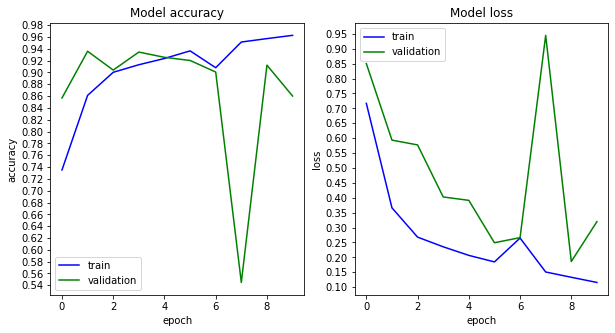

In [49]:
show_history(histtory)

In [50]:
pre = model_CL.predict(Xtest_CL)
pre = np.argmax(pre, axis=1)
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80      9711
           1       0.65      0.64      0.65      2421
           2       0.94      0.72      0.81      7458
           3       0.14      0.24      0.18       200
           4       0.91      0.29      0.44      2754

    accuracy                           0.75     22544
   macro avg       0.67      0.57      0.58     22544
weighted avg       0.79      0.75      0.74     22544



In [51]:
tmp_test = X[Y == 3]
tmp_test = np.reshape(np.array(tmp_test), (np.array(tmp_test).shape[0],np.array(tmp_test).shape[1],1))
pre = model_CL.predict(tmp_test)
pre = np.argmax(pre, axis=1)
print(pre)

[3 3 3 ... 3 3 3]


In [52]:
print(sorted(Counter(pre).items()))

[(0, 1), (3, 67342)]


In [54]:
tmp_test = X_test[Y_test == 3]
tmp_test = np.reshape(np.array(tmp_test), (np.array(tmp_test).shape[0],np.array(tmp_test).shape[1],1))
pre = model_CL.predict(tmp_test)
pre = np.argmax(pre, axis=1)
print(pre)
print(sorted(Counter(pre).items()))

[3 1 3 1 1 1 3 3 1 1 3 1 1 1 1 1 1 1 3 1 3 1 1 3 3 1 1 1 0 3 1 1 4 4 1 3 1
 3 1 3 0 3 0 3 0 3 1 1 1 1 1 1 1 3 1 3 0 1 1 1 1 1 1 0 1 1 1 1 3 1 3 1 1 3
 1 1 1 3 3 3 1 3 3 0 1 1 0 1 3 1 1 1 1 1 0 3 1 4 1 3 1 1 3 0 3 1 1 1 1 0 3
 3 1 3 0 1 3 1 1 1 1 1 4 3 1 1 3 1 1 1 3 1 1 1 1 1 0 1 4 1 1 1 1 1 1 1 3 1
 1 0 1 3 1 1 0 1 1 3 0 1 1 1 0 1 3 3 1 1 0 1 0 1 0 1 3 1 1 1 3 0 1 1 1 3 0
 3 1 1 1 1 1 1 1 4 1 3 1 1 1 3]
[(0, 22), (1, 123), (3, 49), (4, 6)]
